## Text Data Mining


Mostly adapted from: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import arff
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm

from sklearn import tree, linear_model, metrics, dummy, naive_bayes, neighbors

from IPython.display import Image
import pydotplus

import nltk
import gensim
import wordcloud
import pyLDAvis

In [2]:
def get_confusion_matrix(clf, X, y, verbose=True, classes=None):
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y_true=y, y_pred=y_pred)
    clf_report = metrics.classification_report(y, y_pred)
    if classes is None:
        classes = clf.classes_
    df_cm = pd.DataFrame(cm, columns=classes, index=classes)
    if verbose:
        print clf_report
        print df_cm
    return clf_report, df_cm

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [5]:
twenty_train.data[0]

u'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [6]:
twenty_train.target[0]

1

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
classification_categories = ["soc.religion.christian", "sci.med"]

In [9]:
classes = np.array(twenty_train.target_names)

In [10]:
classes

array(['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], 
      dtype='|S22')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

## Show how to get help on functions

In [12]:
CountVectorizer?

In [13]:
count_vec = CountVectorizer(stop_words="english", token_pattern="[a-z]+")

In [14]:
X_train_counts = count_vec.fit_transform(twenty_train.data)
X_test_counts = count_vec.transform(twenty_test.data)

In [15]:
print "X_train_counts.shape =", X_train_counts.shape
print "X_test_counts.shape =", X_test_counts.shape

X_train_counts.shape = (2257, 30877)
X_test_counts.shape = (1502, 30877)


In [16]:
count_vec.vocabulary_.items()[:10]

[(u'raining', 22239),
 (u'uhura', 28449),
 (u'schlegel', 24205),
 (u'hordes', 12488),
 (u'moskowitz', 17773),
 (u'foul', 10438),
 (u'tilton', 27646),
 (u'compatable', 5071),
 (u'circuitry', 4515),
 (u'pantheistic', 19750)]

In [17]:
count_vec.get_feature_names()[100:110]

[u'absent',
 u'absitinence',
 u'absol',
 u'absolute',
 u'absolutely',
 u'absolutes',
 u'absolutism',
 u'absolutist',
 u'absolve',
 u'absorb']

In [18]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train_counts, twenty_train.target)
report, df_cm = get_confusion_matrix(clf, X_train_counts, twenty_train.target, classes=twenty_train.target_names)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       0.99      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      0.99      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     479              0        0   
comp.graphics                     0            584        0   
sci.med                           0              2      592   
soc.religion.christian            0              3        0   

                        soc.religion.christian  
alt.atheism                                  1  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     596  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,479,0,0,1
comp.graphics,0,584,0,0
sci.med,0,2,592,0
soc.religion.christian,0,3,0,596


## Using pipelines

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
clf = Pipeline([
        ("vect", CountVectorizer(stop_words="english", token_pattern="[a-z]+")),
        ("nb_clf", naive_bayes.MultinomialNB())
    ])

In [21]:
X = twenty_train.data
y = twenty_train.target
classes = twenty_train.target_names
clf.fit(X, y)
report, df_cm = get_confusion_matrix(clf, X, y, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       0.99      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      0.99      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     479              0        0   
comp.graphics                     0            584        0   
sci.med                           0              2      592   
soc.religion.christian            0              3        0   

                        soc.religion.christian  
alt.atheism                                  1  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     596  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,479,0,0,1
comp.graphics,0,584,0,0
sci.med,0,2,592,0
soc.religion.christian,0,3,0,596


In [22]:
clf.classes_

array([0, 1, 2, 3])

In [23]:
clf.predict(twenty_test.data[:10])

array([2, 2, 2, 0, 3, 0, 1, 3, 2, 2])

In [24]:
report, df_cm = get_confusion_matrix(clf, twenty_test.data, twenty_test.target, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       319
          1       0.95      0.97      0.96       389
          2       0.96      0.93      0.94       396
          3       0.94      0.96      0.95       398

avg / total       0.94      0.94      0.94      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     289              4        6   
comp.graphics                     6            376        6   
sci.med                          12             12      369   
soc.religion.christian            5              4        5   

                        soc.religion.christian  
alt.atheism                                 20  
comp.graphics                                1  
sci.med                                      3  
soc.religion.christian                     384  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,289,4,6,20
comp.graphics,6,376,6,1
sci.med,12,12,369,3
soc.religion.christian,5,4,5,384


## Using logistic regression

In [25]:
clf = Pipeline([
        ("vect", CountVectorizer(stop_words="english", token_pattern="[a-z]+")),
        ("nb_clf", linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs"))
    ])

In [26]:
X = twenty_train.data
y = twenty_train.target
classes = twenty_train.target_names
clf.fit(X, y)
report, df_cm = get_confusion_matrix(clf, X, y, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       1.00      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      1.00      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     480              0        0   
comp.graphics                     0            584        0   
sci.med                           0              0      594   
soc.religion.christian            0              0        0   

                        soc.religion.christian  
alt.atheism                                  0  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     599  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,480,0,0,0
comp.graphics,0,584,0,0
sci.med,0,0,594,0
soc.religion.christian,0,0,0,599


In [27]:
report, df_cm = get_confusion_matrix(clf, twenty_test.data, twenty_test.target, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.79      0.86       319
          1       0.88      0.95      0.91       389
          2       0.93      0.86      0.90       396
          3       0.87      0.97      0.92       398

avg / total       0.90      0.90      0.90      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     253             12       12   
comp.graphics                     3            368       13   
sci.med                          11             33      342   
soc.religion.christian            5              6        1   

                        soc.religion.christian  
alt.atheism                                 42  
comp.graphics                                5  
sci.med                                     10  
soc.religion.christian                     386  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,253,12,12,42
comp.graphics,3,368,13,5
sci.med,11,33,342,10
soc.religion.christian,5,6,1,386


## Text exploration

## Word clouds

In [28]:
text = " ".join(twenty_train.data)

In [29]:
wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)

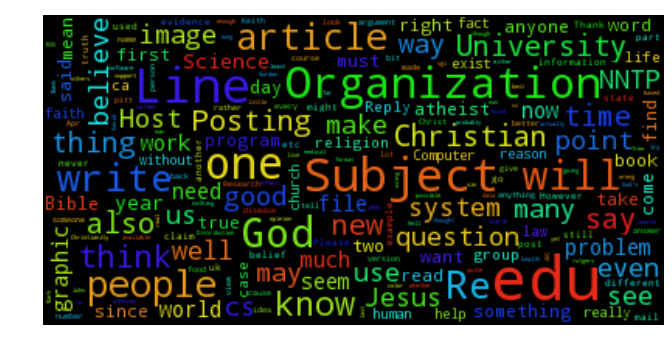

In [31]:
plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [34]:
def get_words_of_class(data, labels, c=0, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    labels = np.array(labels)
    idx = np.where(labels==c)[0]
    text = " ".join(data[i] for i in idx)
    wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
    ax.imshow(wc)
    ax.axis("off")
    return ax

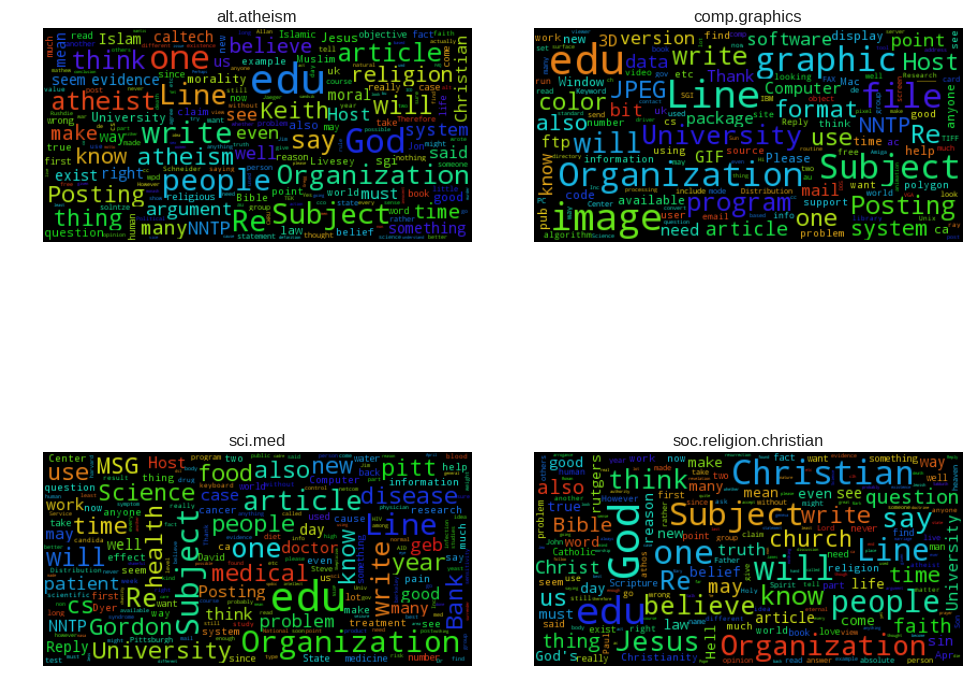

In [36]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
labels = twenty_train.target
data = twenty_train.data
classes = twenty_train.target_names
for i, axi in enumerate(ax):
    get_words_of_class(data, labels, c=i, ax=axi)
    axi.set_title(classes[i])
fig.tight_layout()
    

## Topic Modelling

In [37]:
from nltk.corpus import movie_reviews

In [38]:
movie_reviews.categories()

[u'neg', u'pos']

In [39]:
movie_reviews.words()

[u'plot', u':', u'two', u'teen', u'couples', u'go', ...]

In [40]:
sents = movie_reviews.sents()

In [41]:
len(sents)

71532

In [42]:
sents[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']